<a href="https://colab.research.google.com/github/udaanie/hello-world/blob/master/Linear_Regression_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
#Loading the dataset
electricity=pd.read_csv("Data Set for research.csv", index_col=False)

In [ ]:
#Read the dataset
print('Shape of Data',electricity.shape)
electricity.head()

Shape of Data (50, 4)


,Year,Consumers,GDP,Sales
0,1969,1888,1859465021,297
1,1970,2116,1801344538,331
2,1971,2235,1965546218,373
3,1972,2482,2296470588,419
4,1973,2658,2369308600,437


## **Data Preprocessing**

In [ ]:
#Search for missing values
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       50 non-null     int64
 1   Consumers  50 non-null     int64
 2   GDP        50 non-null     int64
 3   Sales      50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(electricity)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


In [ ]:
#Dropping unwanted columns
drop_cols = ['Consumers','GDP']
electricity.drop(drop_cols, axis=1, inplace=True)
electricity.head()

,Year,Sales
0,1969,297
1,1970,331
2,1971,373
3,1972,419
4,1973,437


In [ ]:
electricity.describe()


,Year,Sales
count,50.00000,50.000000
mean,1993.50000,1614.860000
std,14.57738,1140.496795
min,1969.00000,297.000000
25%,1981.25000,693.250000
50%,1993.50000,1292.000000
75%,2005.75000,2500.000000
max,2018.00000,4289.000000


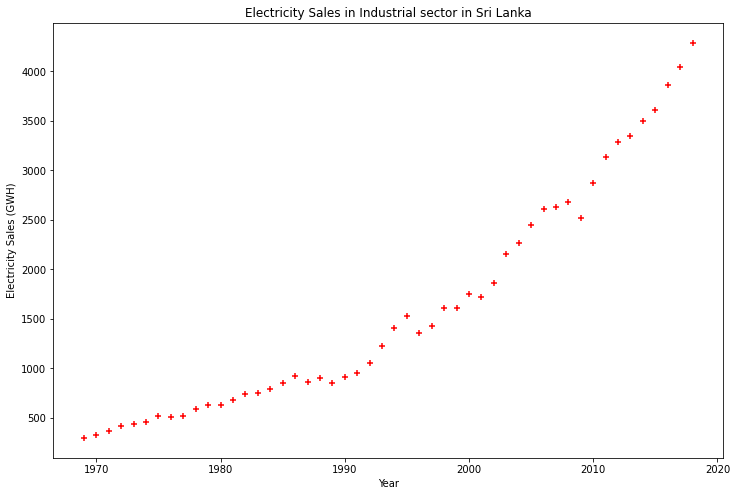

In [ ]:
#Plotting the Scatter Plot

plt.figure(figsize=(12, 8))
plt.title('Electricity Sales in Industrial sector in Sri Lanka')
plt.ylabel('Electricity Sales (GWH)')
plt.xlabel('Year')
plt.scatter(electricity.Year,electricity.Sales, color = 'red', marker='+')

In [ ]:
#recognizinfg x and y variables
df_x = pd.DataFrame(electricity.Year)
df_y = pd.DataFrame(electricity.Sales)
print('Shape of Data df_x',df_x.shape)
print('Shape of Data df_y', df_y.shape)

Shape of Data df_x (50, 1)
Shape of Data df_y (50, 1)


## **Splitting the dataset into training and testing**

In [ ]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.2, random_state =0)

In [ ]:
y_test

,Sales
28,1431
11,626
10,631
41,2871
2,373
27,1361
38,2628
31,1755
22,958
4,437


In [ ]:
print('Shape of y_test',y_test.shape)

Shape of y_test (10, 1)


## **Running Linear Regression and fitting the model to training dataset**

In [ ]:
#Regression model
reg = linear_model.LinearRegression()

In [ ]:
#Fitting the Model to the training dataset
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Calculating the coefficient
Coefficient = reg.coef_
print('Coefficient is: ', Coefficient)

Coefficient is:  [[77.16274322]]


In [ ]:
#Calculaing the intercept
Intercept = reg.intercept_
print('Intercept is:', Intercept)

Intercept is: [-152191.92974067]


In [ ]:
#Predicting the test set
y_predict = reg.predict(x_test)
print(y_predict)

[[1902.06847528]
 [ 590.30184049]
 [ 513.13909727]
 [2905.18413718]
 [-104.16284851]
 [1824.90573206]
 [2673.69590751]
 [2133.55670495]
 [1439.09201595]
 [  50.16263793]]


In [ ]:
print('Shape of y_predict',y_predict.shape)

Shape of y_predict (10, 1)


In [ ]:
predictions = pd.DataFrame(y_predict, columns=['Prediction'])
predictions.reset_index(drop=True, inplace=True)

In [ ]:
y_test.reset_index(drop=True, inplace=True)

In [ ]:
electricity2 = pd.concat([y_test, predictions], axis =1)
electricity2.columns = ['Actual_Sales','Forecast_Sales']
electricity2

,Actual_Sales,Forecast_Sales
0,1431,1902.068475
1,626,590.301840
2,631,513.139097
3,2871,2905.184137
4,373,-104.162849
5,1361,1824.905732
6,2628,2673.695908
7,1755,2133.556705
8,958,1439.092016
9,437,50.162638


In [ ]:
#Prediction on Training set
pred_train = reg.predict(x_train)
print(pred_train)

[[2287.8821914 ]
 [2442.20767784]
 [1747.74298884]
 [2365.04493462]
 [1130.44104305]
 [ 281.6508676 ]
 [ 821.79007016]
 [3213.83511007]
 [3445.32333974]
 [1979.2312185 ]
 [ 898.95281339]
 [2056.39396173]
 [2210.71944817]
 [ 976.11555661]
 [2982.3468804 ]
 [1284.7665295 ]
 [3059.50962362]
 [ 358.81361083]
 [ 744.62732694]
 [1670.58024561]
 [ 127.32538116]
 [1053.27829983]
 [2828.02139396]
 [3522.48608296]
 [-181.32559173]
 [ 667.46458372]
 [2596.53316429]
 [1593.41750239]
 [ 204.48812438]
 [1516.25475917]
 [2519.37042106]
 [1361.92927272]
 [1207.60378628]
 [ 435.97635405]
 [2750.85865073]
 [3290.99785329]
 [ -27.00010529]
 [-258.48833496]
 [3368.16059652]
 [3136.67236685]]


# **Evaluating the Simple Linear Regression model**

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: %.3f' % rmse)

Root Mean Squared Error: 347.508


In [ ]:
#Calculating the R squared value
r2 = r2_score(y_test,predictions)
print('r2 score: %.3f' % r2)


r2 score: 0.829


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_predict)
print('Mean Absolute Precentage Error: %.3f' % mape)

Mean Absolute Precentage Error: 38.255


## **Visualizing Linear Regression model for Training Data Set**

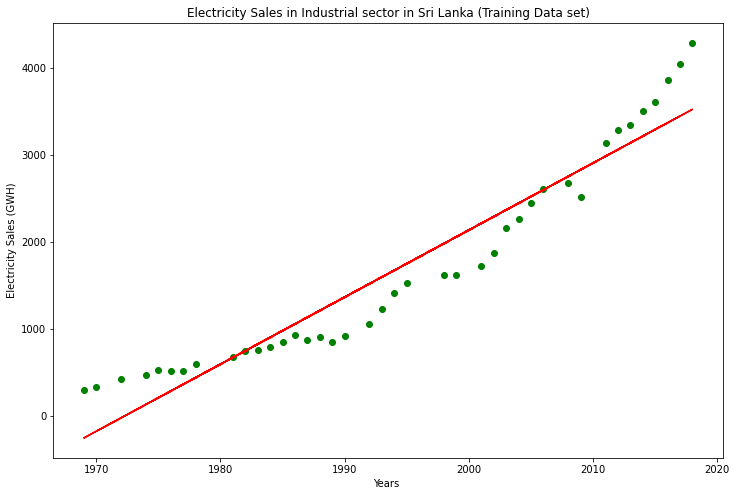

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color = "green")
plt.plot(x_train, pred_train, color = "red")
plt.title("Electricity Sales in Industrial sector in Sri Lanka (Training Data set)")
plt.xlabel("Years ")
plt.ylabel("Electricity Sales (GWH)")
plt.show()

## **Visualizing Linear Regression model for Testing Data Set**

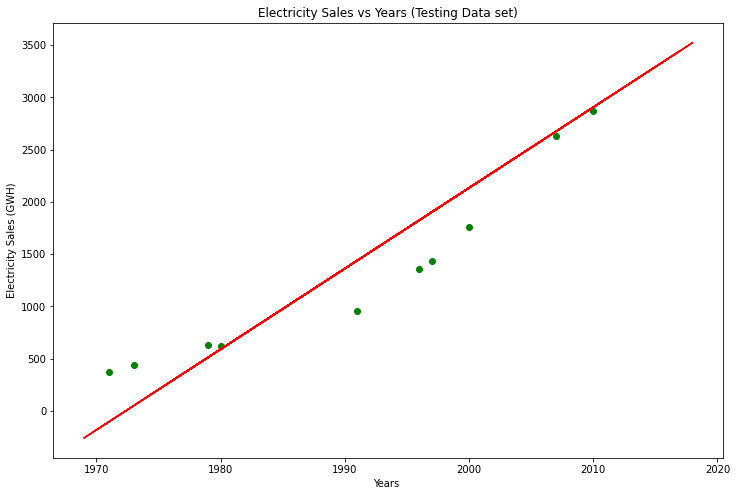

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_train, pred_train, color = "red")
plt.title("Electricity Sales vs Years (Testing Data set)")
plt.xlabel("Years ")
plt.ylabel("Electricity Sales (GWH)")
plt.show()

## **Use the Linear Regression model to make Predictions**

In [ ]:
#Prdiction Fomula
#y=a+bx where y is electricity sales a is intercept, b is Years and x is coefficient

Year = 2018
pred_future = Intercept + Coefficient*Year
print('Predicted Industrial sector electricity Sales for year ', Year, ' is : ', pred_future)


Predicted Industrial sector electricity Sales for year  2018  is :  [[3522.48608296]]
